#                                                Car Price Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## data collection and preprocessing

In [2]:
car_dataset=pd.read_csv("car data.csv")

In [3]:
car_dataset.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Car_Name,ritz,sx4,ciaz,wagon r,swift,vitara brezza,ciaz,s cross,ciaz,ciaz,alto 800,ciaz,ciaz,ertiga,dzire,ertiga,ertiga,ertiga,wagon r,sx4
Year,2014,2013,2017,2011,2014,2018,2015,2015,2016,2015,2017,2015,2015,2015,2009,2016,2015,2016,2015,2010
Selling_Price,3.35,4.75,7.25,2.85,4.6,9.25,6.75,6.5,8.75,7.45,2.85,6.85,7.5,6.1,2.25,7.75,7.25,7.75,3.25,2.65
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,3.6,10.38,9.94,7.71,7.21,10.79,10.79,10.79,5.09,7.98
Kms_Driven,27000,43000,6900,5200,42450,2071,18796,33429,20273,42367,2135,51000,15000,26000,77427,43000,41678,43000,35500,41442
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Diesel,Diesel,Petrol,Diesel,Petrol,Petrol,Petrol,Diesel,Diesel,Diesel,CNG,Petrol
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Automatic,Manual,Manual,Manual,Manual,Manual,Manual,Manual
Owner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
car_dataset.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [5]:
#checking number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_dataset.columns.tolist()

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

### Identify the numerical and categorical columns

In [8]:

numerical_columns = car_dataset.select_dtypes(include=['number']).columns.tolist()
categorical_columns = car_dataset.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
Categorical columns: ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


-  here Car_Name,Fuel_Type,Seller_Type,Transmission are categorical variable
-  here Year,Selling_Price,Present_Price,Kms_Driven,Owner are numerical variable

### Checking the number of missing values

In [9]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

- Here no missing value is present.

### Checking the datatypes

In [10]:
car_dataset.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

### Checking the distribution of categorical data

In [11]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


### Identify the diifferent values in categorical columns

In [12]:
car_dataset.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [13]:
car_dataset.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [14]:
car_dataset.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

### encoding the categorical data(in terms of 0,1,2) using Label Encoder

In [15]:
from sklearn import preprocessing

# Encode categorical variable using label encoder
# select all categorical variables
car_categorical=car_dataset.select_dtypes(include=['object'])
car_categorical.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [16]:
car_categorical.nunique()

Car_Name        98
Fuel_Type        3
Seller_Type      2
Transmission     2
dtype: int64

In [17]:
# aplly Label encoder to df_categorical 
le=preprocessing.LabelEncoder()

In [18]:
car_categorical.shape

(301, 4)

In [19]:
# apply Label encoder to df_categorical
le=preprocessing.LabelEncoder()
car_categorical=car_categorical.apply(le.fit_transform)
car_categorical.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,90,2,0,1
1,93,1,0,1
2,68,2,0,1
3,96,2,0,1
4,92,1,0,1


In [20]:
# concat df_categorical with original df
car_dataset=car_dataset.drop(car_categorical.columns,axis=1)
car_dataset=pd.concat([car_dataset,car_categorical],axis=1)
#df.head()

- Here we encode the categorical data in to numeric value because it is easy to understand for machine learning models

In [21]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,0,90,2,0,1
1,2013,4.75,9.54,43000,0,93,1,0,1
2,2017,7.25,9.85,6900,0,68,2,0,1
3,2011,2.85,4.15,5200,0,96,2,0,1
4,2014,4.60,6.87,42450,0,92,1,0,1


### Spliting data into training and tesing data

- Here we have selling price is  the target variable
- Here all the column except Selling_price and Car_Name are placed into x data frame
- Here only the target column placed into y data frame

In [22]:
#x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
x=car_dataset.drop(['Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [23]:
x.head()

,Year,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,2014,5.59,27000,0,90,2,0,1
1,2013,9.54,43000,0,93,1,0,1
2,2017,9.85,6900,0,68,2,0,1
3,2011,4.15,5200,0,96,2,0,1
4,2014,6.87,42450,0,92,1,0,1


In [24]:
x.shape

(301, 8)

In [25]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
y.shape

(301,)

### Splitting the data and target

- x_train contains the  data of trainining
- x_test contains the price of training data
- y_train contains the traininng data of all data
- y_test contais the corresponding selling_price

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=2)

### Model Training

#### Use Linear Regression Model

In [28]:
# loading regression model
lin_reg_model=LinearRegression()

In [29]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [30]:
# prediction of training data
training_data_prediction=lin_reg_model.predict(x_train)

In [31]:
# R square error
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R square error is:",error_score)

R square error is: 0.8865170837988067


### Visualize the actual and predicted prices

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

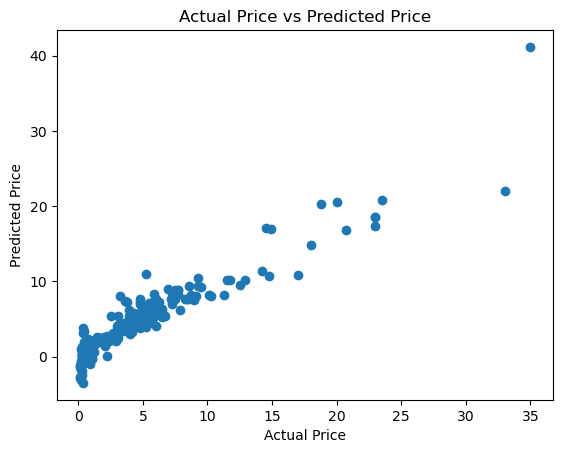

In [32]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

#### Observation:
- As we can see that is no more distance between the values,they are closer to each other.
- when the price increases there some gap between values because thhe price of car with in the range 10,there are less value greater than 10.
- so here the value predicted by our machine learrning model are very close to original sold price.

In [33]:
# prediction of test data
test_data_prediction=lin_reg_model.predict(x_test)

In [34]:
# R square error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R square error is:",error_score)

R square error is: 0.8184427425143406


- so it is good value because if  the R square value is less than the model performance is good.

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

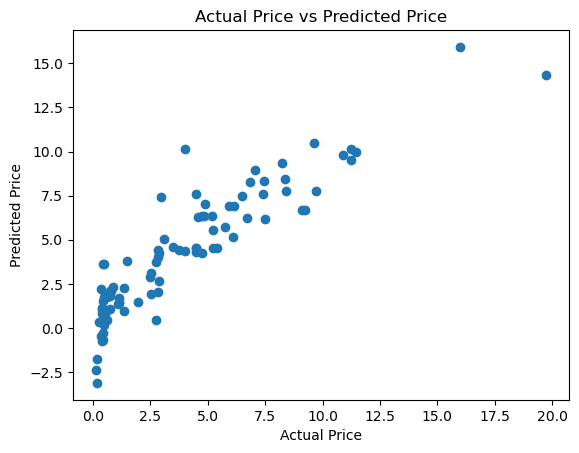

In [35]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

### Use Lasso Regression

In [36]:
# loading regression model
lasso_reg_model=Lasso()

In [37]:
lasso_reg_model.fit(x_train,y_train)

Lasso()

### Model Evaluation

In [38]:
# prediction of training data
training_data_prediction=lasso_reg_model.predict(x_train)

In [39]:
# R square error
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R square error is:",error_score)

R square error is: 0.8489519145137759


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

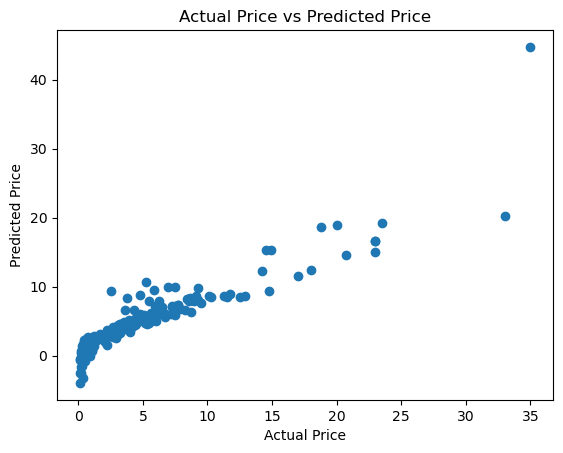

In [40]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

In [41]:
# prediction of test data
test_data_prediction=lasso_reg_model.predict(x_test)

In [42]:
# R square error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R square error is:",error_score)

R square error is: 0.8592221948827378


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

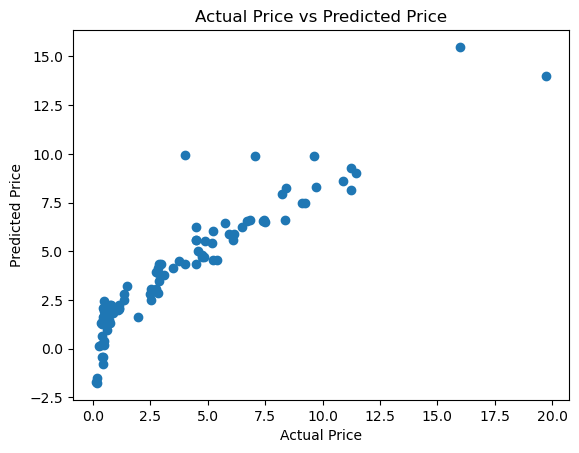

In [43]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

- Here the distance between the points are not very much higher.
- so it is good fit for carprice prediction.

In [44]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,0,90,2,0,1
1,2013,4.75,9.54,43000,0,93,1,0,1
2,2017,7.25,9.85,6900,0,68,2,0,1
3,2011,2.85,4.15,5200,0,96,2,0,1
4,2014,4.60,6.87,42450,0,92,1,0,1


### Building a model which predict the  selling_price of a car

In [45]:
cardata = (2017,9.85,6900,0,68,2,0,1)
#cardata = (2011,4.15,5200,0,96,2,0,1)
###          (year,present_price,kms_driven,Owner,car_name,fuel_type,seller_type,Transmission)
# changing input_data to a numpy array
cardata_as_numpy_array = np.asarray(cardata)
#reshape the array
cardata_reshaped = cardata_as_numpy_array.reshape(1,-1)
prediction = lasso_reg_model.predict(cardata_reshaped)
print(prediction)
print('The selling price is:', prediction[0])

[7.24213123]
The selling price is: 7.242131229519259


- here we predict the selling price is 7.24213123 but the actual price is 7.25 .it is nearly equal.